In [ ]:
Load the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving penguins_size.csv to penguins_size.csv


Load the dataset into tool


In [ ]:
import pandas as pd

# Path to the dataset file in Google Drive
file_path = '/penguins_size.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())



  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Perform Vizualizations

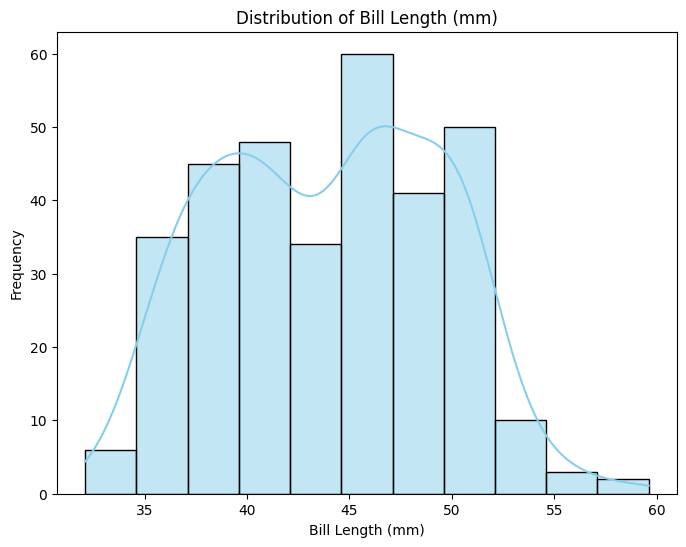

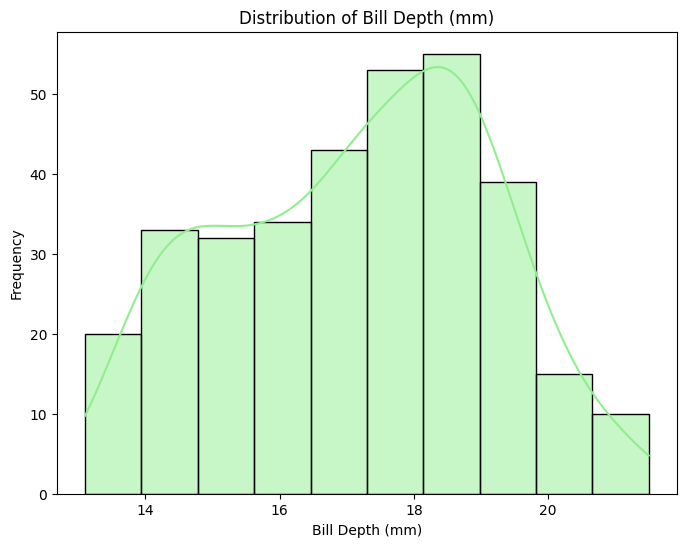

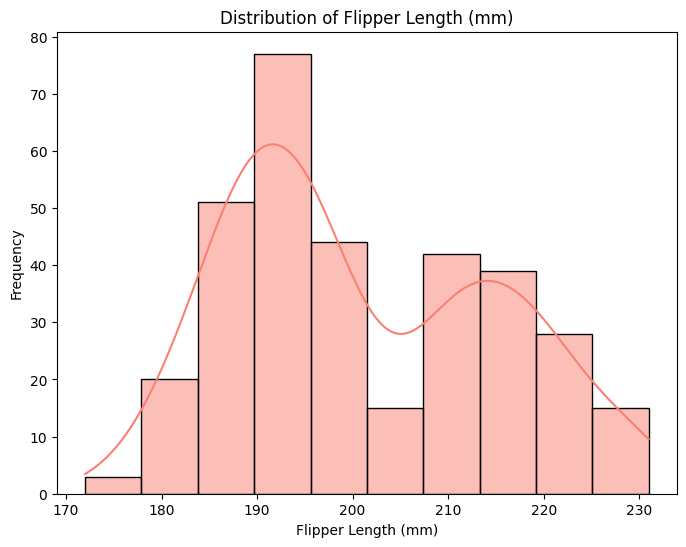

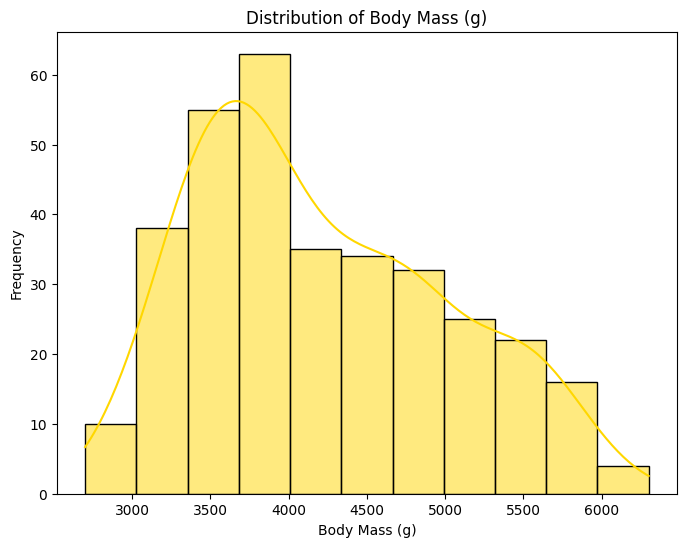

In [ ]:
# Univariate Analysis - Histogram for 'bill_length_mm'
plt.figure(figsize=(8, 6))
sns.histplot(data['culmen_length_mm'], kde=True, color='skyblue')
plt.title('Distribution of Bill Length (mm)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis - Histogram for 'bill_depth_mm'
plt.figure(figsize=(8, 6))
sns.histplot(data['culmen_depth_mm'], kde=True, color='lightgreen')
plt.title('Distribution of Bill Depth (mm)')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis - Histogram for 'flipper_length_mm'
plt.figure(figsize=(8, 6))
sns.histplot(data['flipper_length_mm'], kde=True, color='salmon')
plt.title('Distribution of Flipper Length (mm)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis - Histogram for 'body_mass_g'
plt.figure(figsize=(8, 6))
sns.histplot(data['body_mass_g'], kde=True, color='gold')
plt.title('Distribution of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()



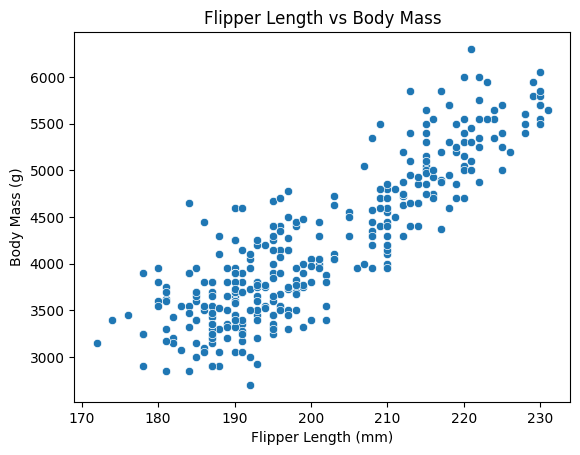

In [ ]:

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=data)
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


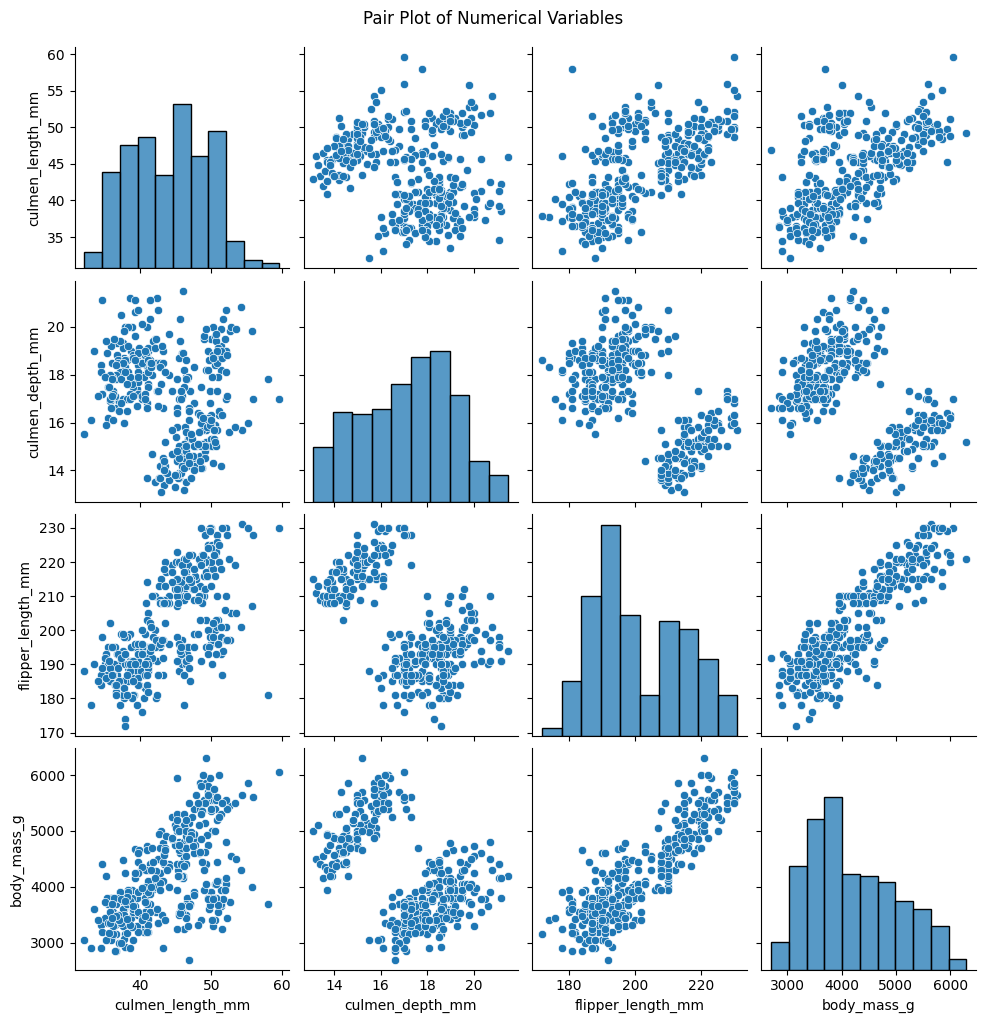

<ipython-input-18-5ef97826f080>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_numeric.corr()


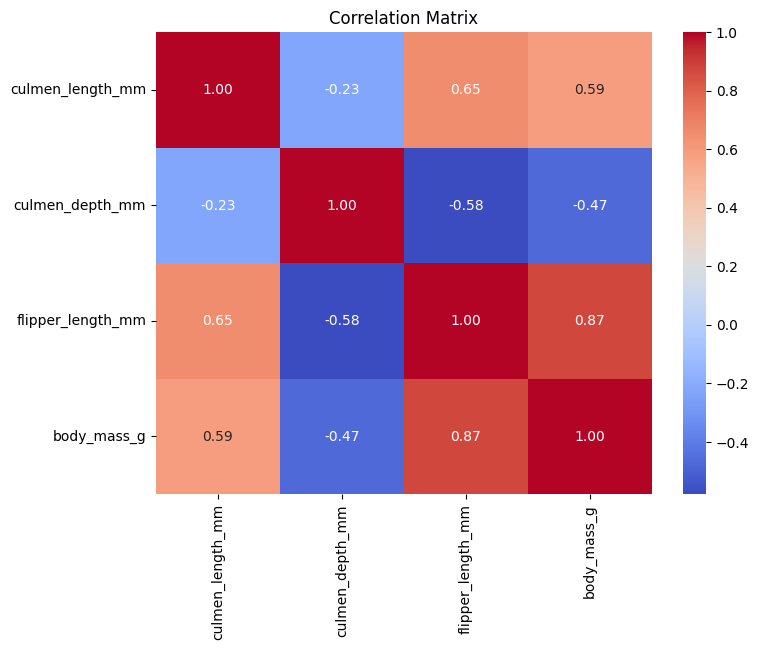

In [ ]:
data.dropna(inplace=True)
data_numeric = data.drop(columns=['species'])
sns.pairplot(data_numeric)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

corr = data_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Descriptive statistics

In [ ]:
print(data.describe())


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         17

Correlation of the data

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


Find the missing values

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

data.dropna(inplace=True)
print("\nAfter dealing with missing values:")
print(data.isnull().sum())

Missing Values:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

After dealing with missing values:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Check outliers and replace them

In [ ]:
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = df[column].median()

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    replace_outliers(data, column)

print("After replacing outliers:")
print(data.describe())

After replacing outliers:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000


Split the data into dependent and independent variables.


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

encoded_data = pd.get_dummies(data, columns=categorical_columns)

print("\nEncoded Data:")
print(encoded_data.head())

Categorical Columns:
Index(['species', 'island', 'sex'], dtype='object')

Encoded Data:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
4               1                  0               0              0   
5               1                  0               0              0   

   island_Dream  island_Torgersen  sex_.  sex_FEMALE

In [ ]:
X = data.drop(columns=['species'])
y = data['species']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
      island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   
2  Torgersen              40.3             18.0              195.0   
4  Torgersen              36.7             19.3              193.0   
5  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  

Target (y):
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_processed)

scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X_processed)

print("Min-Max Scaled Features:")
print(pd.DataFrame(X_scaled_minmax).head())
print("\nStandardized (Z-score Scaled) Features:")
print(pd.DataFrame(X_scaled_standard).head())


Min-Max Scaled Features:
    0    1    2    3    4    5    6         7         8         9         10
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.254545  0.666667  0.152542  0.291667
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.269091  0.511905  0.237288  0.305556
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.298182  0.583333  0.389831  0.152778
3  0.0  0.0  1.0  0.0  0.0  0.0  1.0       NaN       NaN       NaN       NaN
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.167273  0.738095  0.355932  0.208333

Standardized (Z-score Scaled) Features:
         0         1        2         3         4         5         6   \
0 -0.977008 -0.750757  2.36968 -0.053995 -0.960098  1.023533 -0.173032   
1 -0.977008 -0.750757  2.36968 -0.053995  1.041561 -0.977008 -0.173032   
2 -0.977008 -0.750757  2.36968 -0.053995  1.041561 -0.977008 -0.173032   
3 -0.977008 -0.750757  2.36968 -0.053995 -0.960098 -0.977008  5.779273   
4 -0.977008 -0.750757  2.36968 -0.053995  1.041561 -0.977008 -0.173032   

         7         8       

Spplit the data into traniing and testing

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("Number of unique values in y:", y.nunique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Shape of X: (344, 6)
Shape of y: (344,)
Number of unique values in y: 3
Training set shape (X_train, y_train): (275, 6) (275,)
Testing set shape (X_test, y_test): (69, 6) (69,)


Building model,Train model,Evaluate model,Test the model

In [44]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Building model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

